              quote  time_to_delivery
count    550.000000        550.000000
mean    2780.296364         31.790909
std     2863.490863         29.393968
min        0.000000          0.000000
25%      788.500000         10.000000
50%     2022.500000         25.000000
75%     3852.750000         43.750000
max    20540.000000        183.000000
status
Won     278
Lost    272
Name: count, dtype: int64


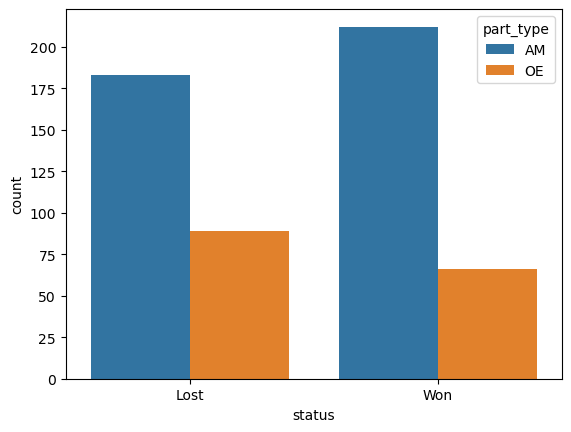

part_type
AM    183
OE     89
Name: count, dtype: int64

Model 1: status ~ quote
                           Logit Regression Results                           
Dep. Variable:             status_num   No. Observations:                  440
Model:                          Logit   Df Residuals:                      438
Method:                           MLE   Df Model:                            1
Date:                Mon, 14 Oct 2024   Pseudo R-squ.:               0.0001880
Time:                        17:44:49   Log-Likelihood:                -304.85
converged:                       True   LL-Null:                       -304.91
Covariance Type:            nonrobust   LLR p-value:                    0.7349
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0030      0.137     -0.022      0.982      -0.272       0.266
quote      -1.201e-05   3.55e-05     -0.338      0

<module 'matplotlib.pyplot' from 'C:\\Users\\tyler\\anaconda3\\Lib\\site-packages\\matplotlib\\pyplot.py'>

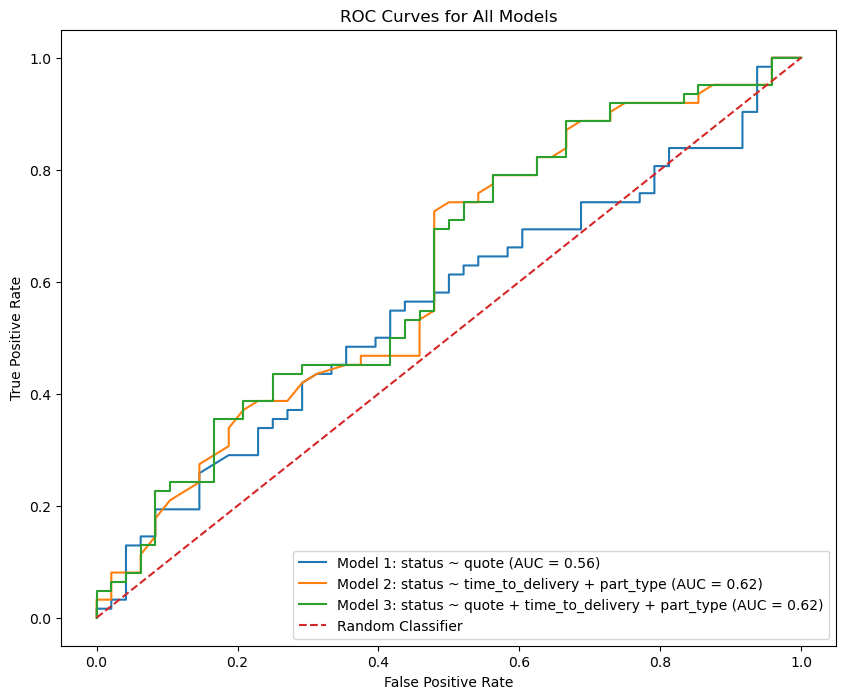

In [33]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, accuracy_score
import statsmodels.api as sm
from statsmodels.tools import add_constant
from statsmodels.discrete.discrete_model import Logit

# Load the dataset and clean column names
lost_sales = pd.read_csv("C:/Users/tyler/Documents/ML Projects (Python)/Projects/Data/LostSales.csv")
lost_sales.columns = lost_sales.columns.str.lower().str.replace(' ', '_')

# Convert 'status' and 'part_type' to categorical types
lost_sales['status'] = lost_sales['status'].astype('category')
lost_sales['part_type'] = lost_sales['part_type'].astype('category')

# Display basic statistics
print(lost_sales.describe())

# Count occurrences of each status
print(lost_sales['status'].value_counts())

# Plot the distribution of 'status' and 'part_type'
sns.countplot(x='status', hue='part_type', data=lost_sales)
plt.show()

# Count 'part_type' where status is 'Lost'
print(lost_sales[lost_sales['status'] == 'Lost']['part_type'].value_counts())

# Convert categorical variables to numeric
le = LabelEncoder()
lost_sales['status_num'] = le.fit_transform(lost_sales['status'])
lost_sales['part_type_num'] = le.fit_transform(lost_sales['part_type'])

# Prepare features and target
X = lost_sales[['quote', 'time_to_delivery', 'part_type_num']]
y = lost_sales['status_num']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# List to store model results
models = []

# Model 1: status ~ quote
X1_train = add_constant(X_train[['quote']])
X1_test = add_constant(X_test[['quote']])
model1 = Logit(y_train, X1_train).fit(disp=0)

y_pred_train1 = (model1.predict(X1_train) > 0.5).astype(int)
accuracy_train1 = accuracy_score(y_train, y_pred_train1)
roc_auc_train1 = roc_auc_score(y_train, model1.predict(X1_train))

y_pred_test1 = (model1.predict(X1_test) > 0.5).astype(int)
accuracy_test1 = accuracy_score(y_test, y_pred_test1)
roc_auc_test1 = roc_auc_score(y_test, model1.predict(X1_test))

models.append({
    'model': model1,
    'name': "Model 1: status ~ quote",
    'accuracy_train': accuracy_train1,
    'roc_auc_train': roc_auc_train1,
    'accuracy_test': accuracy_test1,
    'roc_auc_test': roc_auc_test1
})

# Model 2: status ~ time_to_delivery + part_type
X2_train = add_constant(X_train[['time_to_delivery', 'part_type_num']])
X2_test = add_constant(X_test[['time_to_delivery', 'part_type_num']])
model2 = Logit(y_train, X2_train).fit(disp=0)

y_pred_train2 = (model2.predict(X2_train) > 0.5).astype(int)
accuracy_train2 = accuracy_score(y_train, y_pred_train2)
roc_auc_train2 = roc_auc_score(y_train, model2.predict(X2_train))

y_pred_test2 = (model2.predict(X2_test) > 0.5).astype(int)
accuracy_test2 = accuracy_score(y_test, y_pred_test2)
roc_auc_test2 = roc_auc_score(y_test, model2.predict(X2_test))

models.append({
    'model': model2,
    'name': "Model 2: status ~ time_to_delivery + part_type",
    'accuracy_train': accuracy_train2,
    'roc_auc_train': roc_auc_train2,
    'accuracy_test': accuracy_test2,
    'roc_auc_test': roc_auc_test2
})

# Model 3: status ~ quote + time_to_delivery + part_type
X3_train = add_constant(X_train)
X3_test = add_constant(X_test)
model3 = Logit(y_train, X3_train).fit(disp=0)

y_pred_train3 = (model3.predict(X3_train) > 0.5).astype(int)
accuracy_train3 = accuracy_score(y_train, y_pred_train3)
roc_auc_train3 = roc_auc_score(y_train, model3.predict(X3_train))

y_pred_test3 = (model3.predict(X3_test) > 0.5).astype(int)
accuracy_test3 = accuracy_score(y_test, y_pred_test3)
roc_auc_test3 = roc_auc_score(y_test, model3.predict(X3_test))

models.append({
    'model': model3,
    'name': "Model 3: status ~ quote + time_to_delivery + part_type",
    'accuracy_train': accuracy_train3,
    'roc_auc_train': roc_auc_train3,
    'accuracy_test': accuracy_test3,
    'roc_auc_test': roc_auc_test3
})

# Print model summaries and performance metrics
for model_info in models:
    print(f"\n{model_info['name']}")
    print(model_info['model'].summary())
    print(f"Training Accuracy: {model_info['accuracy_train']:.4f}")
    print(f"Training ROC-AUC: {model_info['roc_auc_train']:.4f}")
    print(f"Test Accuracy: {model_info['accuracy_test']:.4f}")
    print(f"Test ROC-AUC: {model_info['roc_auc_test']:.4f}")

# Prepare data for side-by-side comparison
comparison_data = pd.DataFrame({
    'Model': [model['name'] for model in models],
    'Train Accuracy': [model['accuracy_train'] for model in models],
    'Train ROC-AUC': [model['roc_auc_train'] for model in models],
    'Test Accuracy': [model['accuracy_test'] for model in models],
    'Test ROC-AUC': [model['roc_auc_test'] for model in models]
})

# Display side-by-side comparison
print("\nModel Performance Comparison:")
print(comparison_data.to_string(index=False))

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
for model_info in models:
    model = model_info['model']
    X_test_model = add_constant(X_test[model.model.exog_names[1:]])  # Exclude constant
    y_pred_proba = model.predict(X_test_model)
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model_info['name']} (AUC = {model_info['roc_auc_test']:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for All Models')
plt.legend()
plt